
### 1. **Introducción**
   - Propósito: Explicar cómo la estadística permite entender los datos en profundidad y realizar generalizaciones.
   - Objetivo: Mostrar herramientas y conceptos esenciales de estadística para data science y cómo interpretar y trabajar con datos bajo el supuesto de normalidad.

### 2. **Carga de Bibliotecas y Datos de Ejemplo**
   - Incluir bibliotecas necesarias: `pandas`, `numpy`, `matplotlib`, `seaborn`, `scipy`.
   - Cargar un dataset común para los ejemplos (tomamos el dataset `tips` de `seaborn`).

### 3. **Tipos de Variables**
   - Explicación y ejemplos de variables **cualitativas** (categorías) y **cuantitativas** (numéricas).
   - Ejercicio práctico: Diferenciar las variables del dataset cargado.

### 4. **Medidas Descriptivas**
   - **Medidas de tendencia central**: media, mediana, moda.
   - **Medidas de dispersión**: varianza, desviación estándar.
   - **Cuantiles y percentiles**: cómo ayudan a ver la distribución de datos.
   - Ejercicio práctico: Calcular y visualizar estas medidas para cada variable cuantitativa.

### 5. **Distribuciones de Datos**
   - Comparación entre distribuciones **uniforme** y **normal**.
   - Visualización de la distribución de cada variable con histogramas y gráficos de densidad.
   - Ejercicio práctico: Comprobar la normalidad de una variable con una prueba de Shapiro-Wilk o de Anderson-Darling.

### 6. **Concepto de Normalidad en Estadística**
   - Qué significa que un fenómeno sea "normal".
   - Explicación de la **Distribución Normal** y su importancia en data science.
   - Ejemplo: Generar datos aleatorios con `numpy` siguiendo una distribución normal y compararlos con los datos del dataset.

### 7. **Pruebas de Normalidad**
   - Realizar una prueba de normalidad en los datos usando `scipy.stats`.
   - Interpretación de resultados y sus implicaciones en los análisis.



In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Cargar el dataset `tips` de seaborn
tips = sns.load_dataset("tips")
# Mostrar las primeras filas del dataset
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
# Medidas descriptivas para la columna 'total_bill'
mean_total_bill = tips['total_bill'].mean()
median_total_bill = tips['total_bill'].median()
mode_total_bill = tips['total_bill'].mode()[0]  # Primer valor de la moda

# Medidas de dispersión
std_total_bill = tips['total_bill'].std()#desviacion estandar

var_total_bill = tips['total_bill'].var()#varianza

print(f"Media: {mean_total_bill}")
print(f"Mediana: {median_total_bill}")
print(f"Moda: {mode_total_bill}")
print(f"Desviación Estándar: {std_total_bill}")
print(f"Varianza: {var_total_bill}")


Media: 19.78594262295082
Mediana: 17.795
Moda: 13.42
Desviación Estándar: 8.902411954856856
Varianza: 79.25293861397826


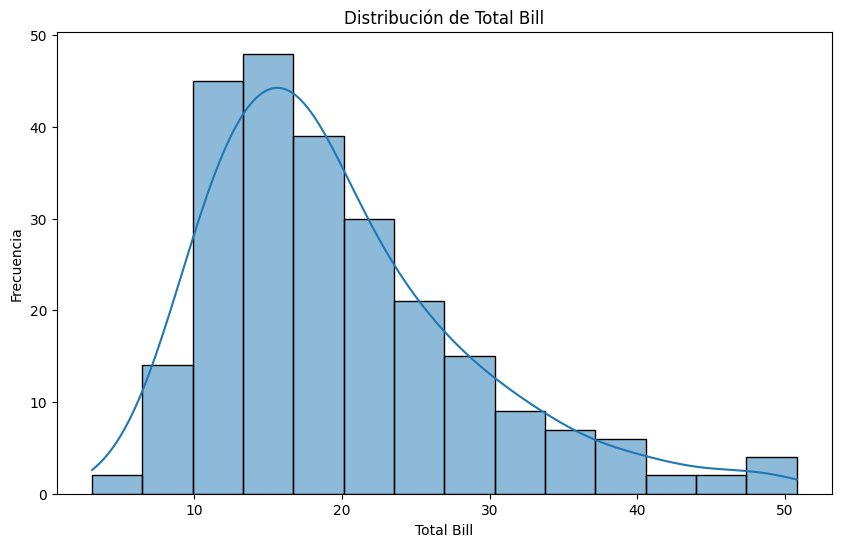

In [ ]:
# Histograma y gráfica de densidad
plt.figure(figsize=(10, 6))
sns.histplot(tips['total_bill'], kde=True)
plt.title('Distribución de Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
# Prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(tips['total_bill'])#0 menos normal es, 1 es normal
print(f'Estadístico de Shapiro-Wilk: {stat}')
print(f'Valor p: {p_value}')

# Interpretación del resultado
if p_value > 0.05:
    print("No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.")#p value mayor a 0.05 para que la distrb sea normal


Estadístico de Shapiro-Wilk: 0.9197187941346584
Valor p: 3.3245391868090786e-10
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


* Estadístico de Shapiro-Wilk: Es un valor que mide qué tan cerca están los datos de seguir una distribución normal. Este valor va de 0 a 1, donde los valores cercanos a 1 sugieren una mayor normalidad.

* Aqui, el estadístico es 0.9197, lo cual indica que hay algo de desviación respecto a la normalidad, aunque no es un valor extremadamente bajo.
Valor p: Es la probabilidad de obtener un resultado tan extremo como el observado, suponiendo que los datos siguen una distribución normal (hipótesis nula). Un valor p bajo (generalmente menos de 0.05) sugiere que los datos no siguen una distribución normal.

* Aquí, el valor p es 3.3245e-10 (0.00000000033245), que es muy pequeño, mucho menor que 0.05. Esto significa que existe suficiente evidencia para rechazar la hipótesis nula de normalidad, indicando que los datos no siguen una distribución normal.


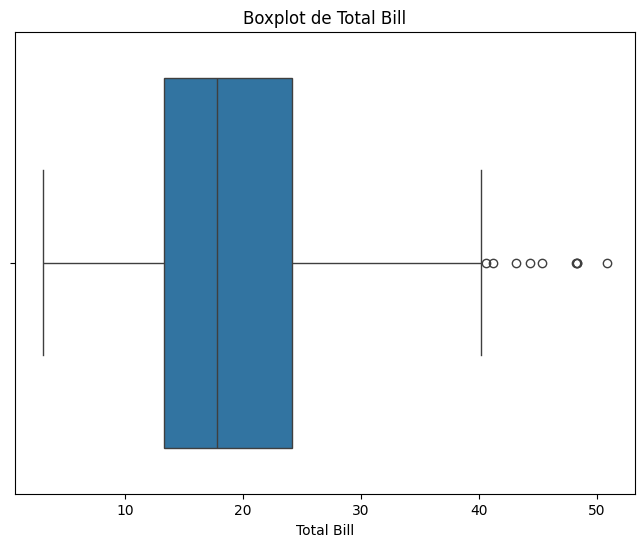

In [ ]:
# Crear boxplot para la columna 'total_bill'
plt.figure(figsize=(8, 6))
sns.boxplot(x=tips['total_bill'])#una Y dia de smana
plt.title('Boxplot de Total Bill')
plt.xlabel('Total Bill')
plt.show()


IQR= NO ES NORMAL

In [ ]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = tips['total_bill'].quantile(0.25)
Q3 = tips['total_bill'].quantile(0.75)
IQR = Q3 - Q1
IQR

10.779999999999998

In [ ]:


# Limites inferior y superior para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Limite Inferior: {lower_bound}")
print(f"Limite Superior: {upper_bound}")


Limite Inferior: -2.8224999999999945
Limite Superior: 40.29749999999999


In [ ]:
# Filtrar datos sin outliers
tips_no_outliers_iqr = tips[(tips['total_bill'] >= lower_bound) & (tips['total_bill'] <= upper_bound)]

# Mostrar el tamaño antes y después de la eliminación
print(f"Tamaño original: {tips.shape[0]}")
print(f"Tamaño después de eliminar outliers: {tips_no_outliers_iqr.shape[0]}")


Tamaño original: 244
Tamaño después de eliminar outliers: 235


Z SCORE VARIABLE NORMAL

In [ ]:
# Calcular el Z-score para 'total_bill'
z_scores = np.abs(stats.zscore(tips['total_bill']))

# Filtrar los datos manteniendo aquellos con Z-score menor o igual a 3
tips_no_outliers_z = tips[z_scores <= 3]

# Mostrar el tamaño antes y después de la eliminación
print(f"Tamaño original: {tips.shape[0]}")
print(f"Tamaño después de eliminar outliers con Z-score: {tips_no_outliers_z.shape[0]}")


Tamaño original: 244
Tamaño después de eliminar outliers con Z-score: 240


CON Y SIN OUTLIER

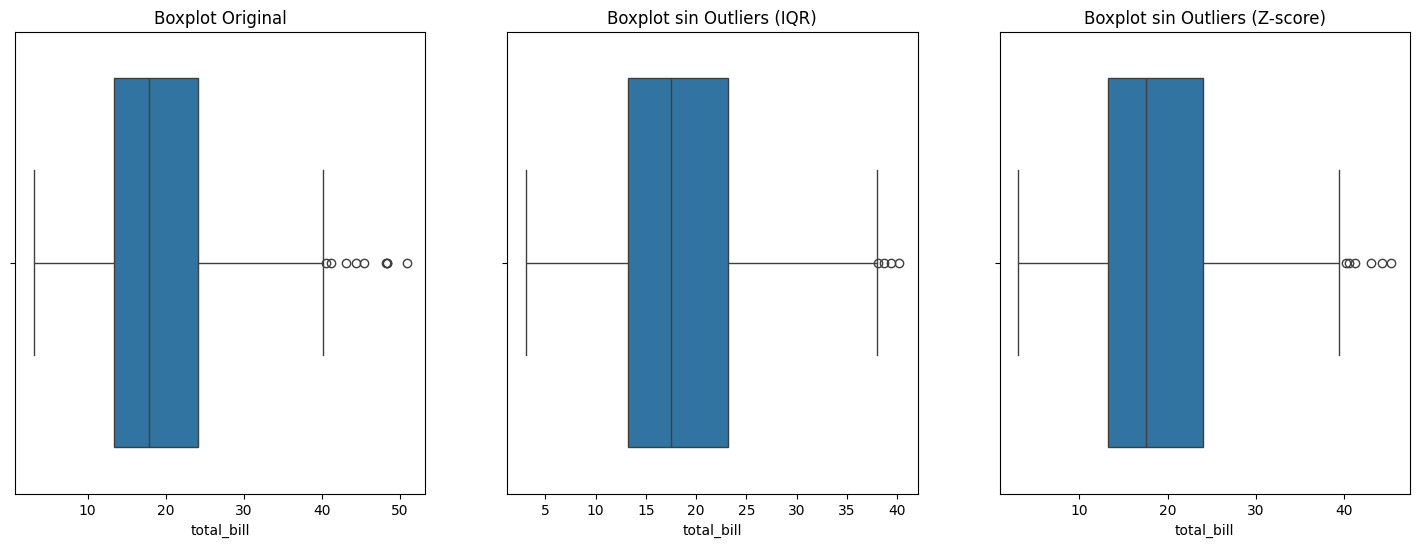

In [ ]:
# Comparar el boxplot antes y después de la limpieza de outliers
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot original
sns.boxplot(x=tips['total_bill'], ax=axs[0])
axs[0].set_title('Boxplot Original')

# Boxplot sin outliers usando IQR
sns.boxplot(x=tips_no_outliers_iqr['total_bill'], ax=axs[1])
axs[1].set_title('Boxplot sin Outliers (IQR)')

# Boxplot sin outliers usando Z-score
sns.boxplot(x=tips_no_outliers_z['total_bill'], ax=axs[2])
axs[2].set_title('Boxplot sin Outliers (Z-score)')

plt.show()
